# Redes Multicapa para Regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions3 import *

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a)
Implementar una red neuronal multicapa, que funcione para cualquier valor $L \ge 1$, y $M^{(l)} \ge 1$, así como el algoritmo de optimización de descenso por gradiente y backpropagation para optimizar los pesos de las unidades ocultas, asumiendo una “loss-function” que sea la suma de los errores cuadráticos.

In [4]:
data = one_hot_encoding(data, 'extracurricular_activities')
train_data, test_data = train_test_split(data, test_size=0.2, seed=42)

X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

X_train

,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities_False,extracurricular_activities_True
0,7.512345,5.072058,8.775325,14,0,1
1,7.645378,5.266626,8.351701,6,0,1
2,7.096499,3.071855,8.498025,2,0,1
3,6.454375,3.299192,9.913947,9,1,0
4,7.731830,2.091205,4.052463,17,1,0
...,...,...,...,...,...,...
1115,8.401831,5.314130,4.808138,16,1,0
1116,6.644282,4.947815,5.392057,2,1,0
1117,7.629650,4.989611,6.980204,9,1,0
1118,8.681235,5.776701,8.484583,9,1,0


In [113]:
nn_1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], activations='default', verbose=False)

# Fit the MLP model to the training data
train_losses_1, test_losses_1 = nn_1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')


100%|██████████| 200/200 [00:12<00:00, 16.31it/s]


In [114]:
nn_1.num_layers
nn_1.layers
nn_1.activations

['relu', 'relu', 'linear']

In [76]:
nn_2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], activations=['relu', 'relu', 'linear'], verbose=False)

# Fit the MLP model to the training data
train_losses_2, test_losses_2 = nn_2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

100%|██████████| 200/200 [00:16<00:00, 12.41it/s]


In [77]:
nn_3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1], activations=['relu', 'relu', 'relu', 'linear'], verbose=False)

# Fit the MLP model to the training data
train_losses_3, test_losses_3 = nn_3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

100%|██████████| 200/200 [00:20<00:00,  9.89it/s]


In [78]:
nn_4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], activations=['relu', 'linear'], verbose=False)

# Fit the MLP model to the training data
train_losses_4, test_losses_4 = nn_4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='single_example')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:11<00:00, 17.48it/s]


### b)
Implementar descenso por gradiente estocástico y graficar la evolución del error de entrenamiento en función de las  épocas.

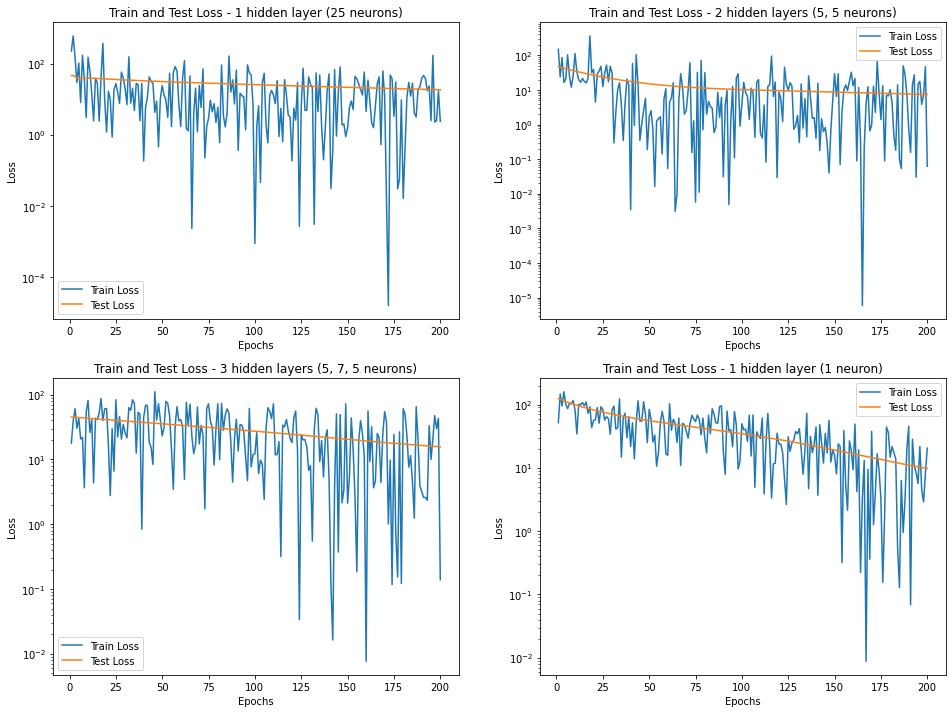

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_1) + 1), train_losses_1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_1) + 1), test_losses_1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_2) + 1), train_losses_2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_2) + 1), test_losses_2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_3) + 1), train_losses_3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_3) + 1), test_losses_3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_4) + 1), train_losses_4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_4) + 1), test_losses_4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

In [80]:
for i in range(1, 5):
    nn = eval(f'nn_{i}')
    predictions = nn.predict(X_test)
    print(f'nn_{i} Predictions:')
    print("  Predictions  |   Test")
    for i in range(len(predictions)):
        print(predictions[i], y_test[i])
    print('\n')
predictions = nn_1.predict(X_test)

nn_1 Predictions:
  Predictions  |   Test
[8.95191573] 9.678152468405315
[10.21265026] 7.337679311836268
[7.47248552] 4.542551445452206
[10.21055682] 4.408466887658554
[6.49526823] 6.5918391130432274
[5.02745927] 7.126303113365252
[1.34403196] 5.824865318066567
[8.718935] 4.318271770712224
[7.45427273] 2.6946935959490674
[5.61389097] 4.621360632505932
[-5.10685263] 6.289601307408167
[5.08541056] 6.659869395546703
[6.95318066] 8.050121380949898
[8.68359862] 1.851851851851852
[4.88002532] 7.629186838253545
[7.62630222] 3.628587783482679
[6.28812471] 6.490047212114392
[4.93783862] 10.0
[5.22869029] 7.926128337307125
[9.80374611] 5.3777726427393455
[5.37328498] 7.71268659291545
[9.96260187] 1.851851851851852
[2.97481683] 6.9952581159936535
[4.19835068] 8.652310141516276
[1.80819455] 8.104721281886103
[5.18104214] 5.10361369184111
[1.06763802] 8.99645782049267
[1.49928625] 6.235928190854355
[6.87750143] 5.7733074895165295
[7.07189632] 7.697125657561498
[6.78264877] 6.698293228713865
[9.9931

### c)
Implementar descenso por gradiente con mini-baches, y graficar la evolución del error de entrenamiento en función de las épocas, para distintos tamaños de baches. Deberáas elegir a tu criterio el tamaño de los mini-batches.

In [84]:
nn_c1 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 25, 1], activations=['relu', 'linear'], verbose=False)
# Fit the MLP model to the training data
train_losses_c1, test_losses_c1 = nn_c1.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c2 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 5, 1], activations=['relu', 'relu', 'linear'], verbose=False)
# Fit the MLP model to the training data
train_losses_c2, test_losses_c2 = nn_c2.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c3 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 5, 7, 5, 1], activations=['relu', 'relu', 'relu', 'linear'], verbose=False)
# Fit the MLP model to the training data
train_losses_c3, test_losses_c3 = nn_c3.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

nn_c4 = MLP(input_size=X_train.shape[1], layers=[X_train.shape[1], 1, 1], activations=['relu', 'linear'], verbose=False)
# Fit the MLP model to the training data
train_losses_c4, test_losses_c4 = nn_c4.fit(training_data=list(zip(X_train.values, y_train)), 
                                    test_data=list(zip(X_test.values, y_test)), 
                                    max_epochs=200, 
                                    mini_batch_size=10, 
                                    alpha=1e-7,
                                    update_rule='mini_batch')

100%|██████████| 200/200 [00:10<00:00, 19.64it/s]


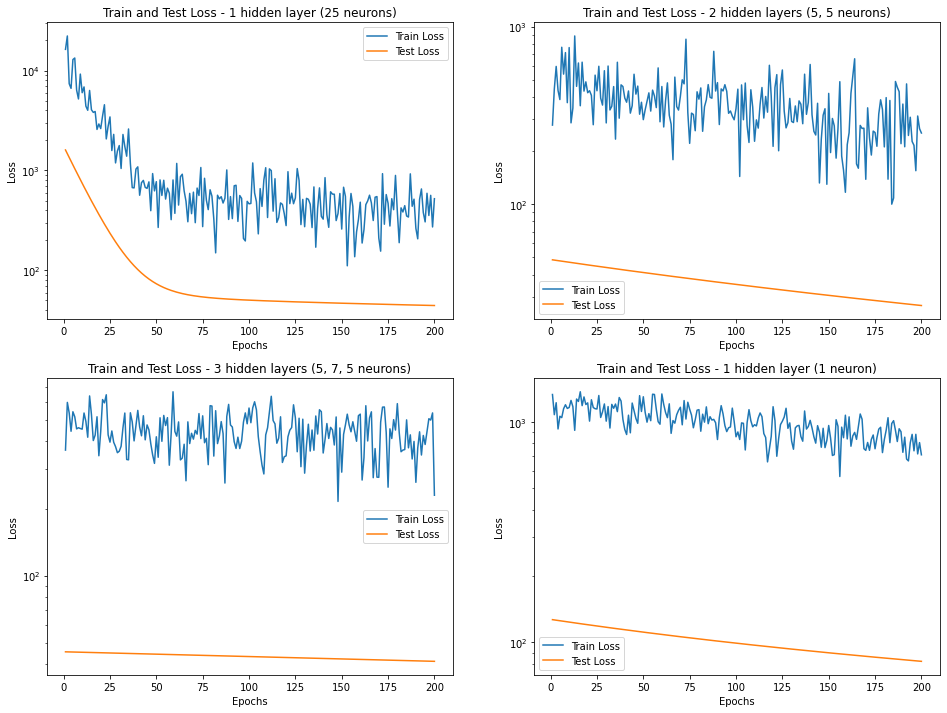

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(range(1, len(train_losses_c1) + 1), train_losses_c1, label='Train Loss')
axs[0, 0].plot(range(1, len(test_losses_c1) + 1), test_losses_c1, label='Test Loss')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train and Test Loss - 1 hidden layer (25 neurons)')
axs[0, 0].legend()

axs[0, 1].plot(range(1, len(train_losses_c2) + 1), train_losses_c2, label='Train Loss')
axs[0, 1].plot(range(1, len(test_losses_c2) + 1), test_losses_c2, label='Test Loss')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Train and Test Loss - 2 hidden layers (5, 5 neurons)')
axs[0, 1].legend()

axs[1, 0].plot(range(1, len(train_losses_c3) + 1), train_losses_c3, label='Train Loss')
axs[1, 0].plot(range(1, len(test_losses_c3) + 1), test_losses_c3, label='Test Loss')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Train and Test Loss - 3 hidden layers (5, 7, 5 neurons)')
axs[1, 0].legend()

axs[1, 1].plot(range(1, len(train_losses_c4) + 1), train_losses_c4, label='Train Loss')
axs[1, 1].plot(range(1, len(test_losses_c4) + 1), test_losses_c4, label='Test Loss')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Train and Test Loss - 1 hidden layer (1 neuron)')
axs[1, 1].legend()

plt.show()

### d)
Utilizando el set de desarrollo y la metodología de cross-validation, seleccionar los hiperparámetros de la red. Para esto puede usar el algoritmo de gradiente descendiente que usted desee (normalmente, uno querrá usar el optimizador que mejor resultado le haya dado, en cuanto a performance del modelo entrenado y el tiempo de convergencia).

**Sugerencia:** si bien uno puede hacer una búsqueda exhaustiva sobre el espacio de hiperparámetros $L$ y $M^{(l)}$, esto puede resultar computacionalmente demasiado costoso, debido a que para cada combinación y cada fold, se de debe re-entrenar el modelo y evaluarlo. Piense si hay alguna manera de recorrer el espacio de búsqueda con menor costo computacional. Además, recuerde que dados dos modelos de performance similar, se privilegia elegir el de menor complejidad (menor cantidad de parámetros), porque tenderá a tener menor varianza en el error predictivo sobre data sets “nuevos” (es decir, que no hayan sido usados para el deasrrollo del modelo).


In [ ]:
numbers = [5, 10, 25, 50, 100, 500]

# build table of hiperparameters to test
hiperparameters = {
    'layers': [[[X_train.shape[1], i, 1], [X_train.shape[1], i//2, i//2, 1], [X_train.shape[1], i//4, i//2, i//4, 1]] for i in numbers],
    'activations': [['relu', 'linear'], ['relu', 'relu', 'linear'], ['relu', 'relu', 'relu', 'linear'], ['relu', 'linear']], # not every combination of activations is valid, another option is to assign the activation that matches the amount of layers
    'alpha': [1e-5, 1e-6, 1e-7, 1e-8, 1e-9],
    'mini_batch_size': [6, 10, 20, 40]
}

### e)
Analizar la performance de su modelo final en términos de $RMSE$, $MAE$ y $R^2$, y graficar $\hat{y}$ vs. $y$ sobre los datos “held out” de los folds de cross-validaion. Compare esto con la performance del modelo de regresión lineal desarrollado en el problema anterior. ¿Cuál de los dos modelos cree usted que generalizará mejor? ¿Por qué?
